In [2]:
# Standard libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Append base directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
path1p = os.path.dirname(currentdir)
path2p = os.path.dirname(path1p)
libpath = os.path.join(path1p, "lib")
pwd_mat = os.path.join(os.path.join(path2p, "data/"), "sim_ds_mat")
pwd_h5 = os.path.join(os.path.join(path2p, "data/"), "sim_ds_h5")

sys.path.insert(0, libpath) 
print("Appended library directory", libpath)

# User libraries
from matlab.matlab_yaro_lib import read_mat
from signal_lib import downsample
from corr_lib import sprMat
#from idtxl_wrapper import idtxlResultsParse

# IDTxl libraries
from idtxl.bivariate_mi import BivariateMI
from idtxl.multivariate_mi import MultivariateMI
from idtxl.bivariate_te import BivariateTE
from idtxl.multivariate_te import MultivariateTE
from idtxl.data import Data
from idtxl.visualise_graph import plot_network

Appended library directory /media/aleksejs/DataHDD/work/codes/theoretical-models/experimental-bridge/nest-mesoscopic-metric-test/codes/lib


## Processing single point data

In [7]:
def getData(fname):
    filename = os.path.join(pwd_h5, os.path.join("real_data", fname))
    h5f = h5py.File(filename, "r")
    TE = np.copy(h5f['results']['TE_table'])
    lag = np.copy(h5f['results']['delay_table'])
    p = np.copy(h5f['results']['p_table'])
    h5f.close()
    return TE, lag, p

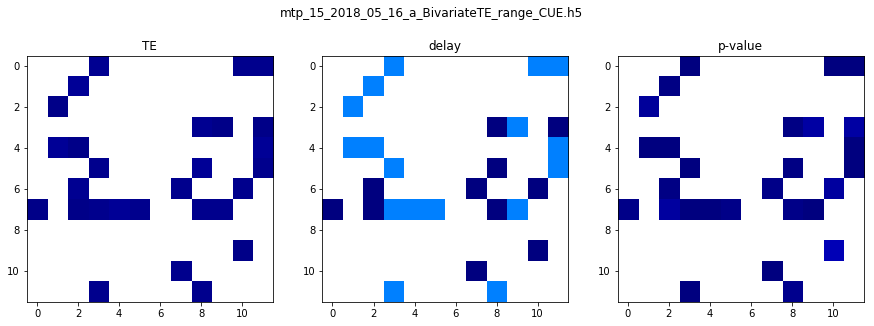

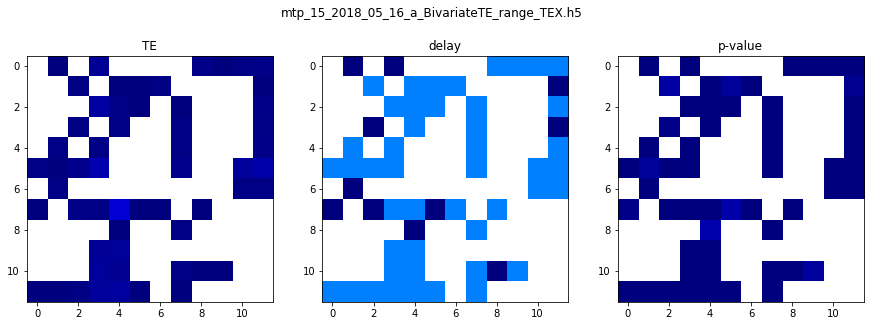

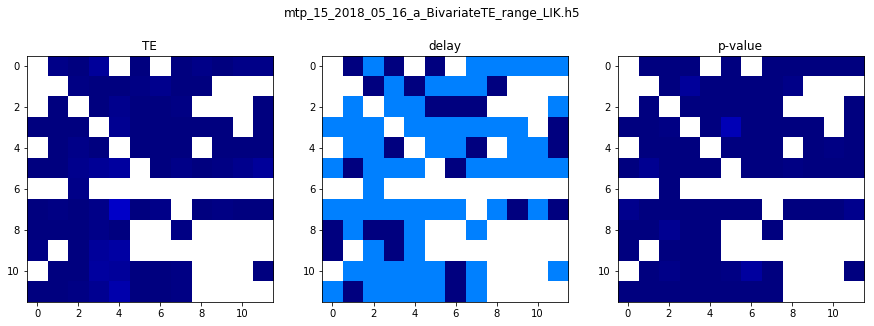

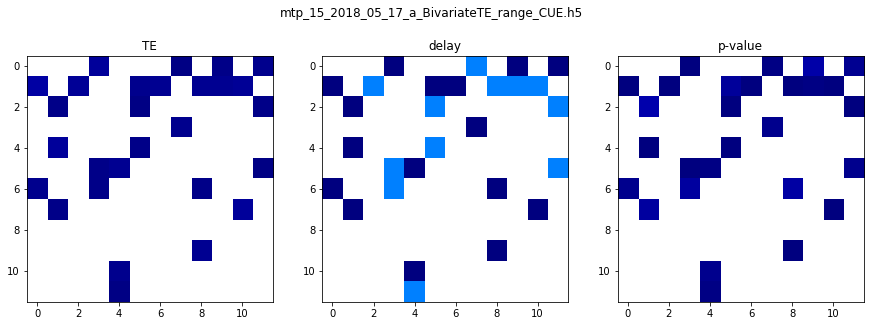

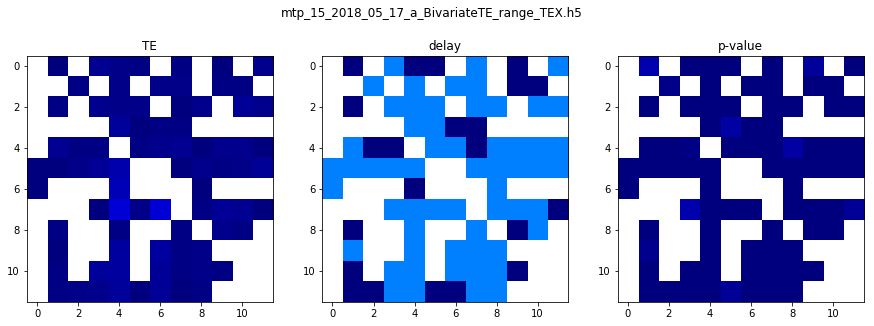

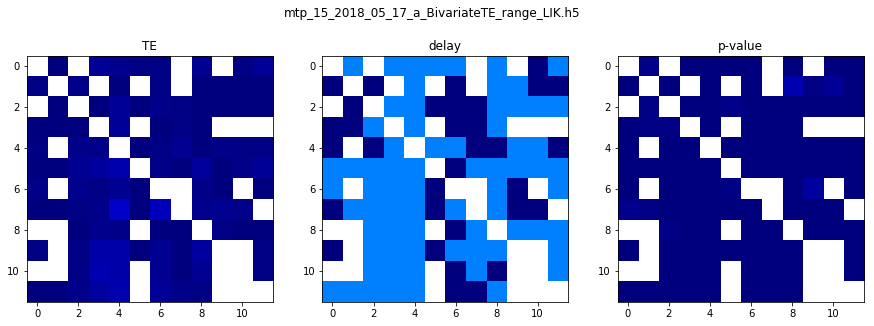

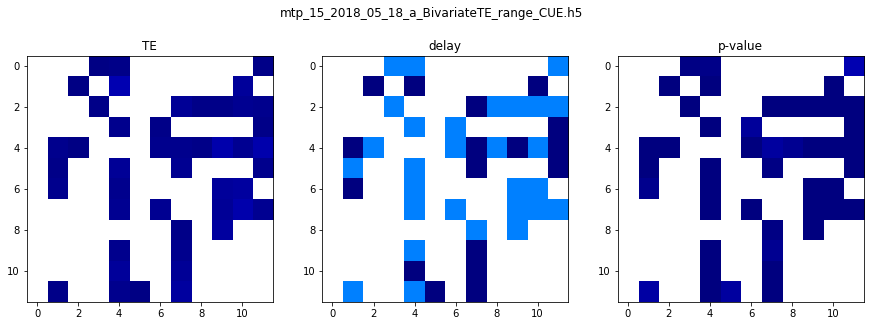

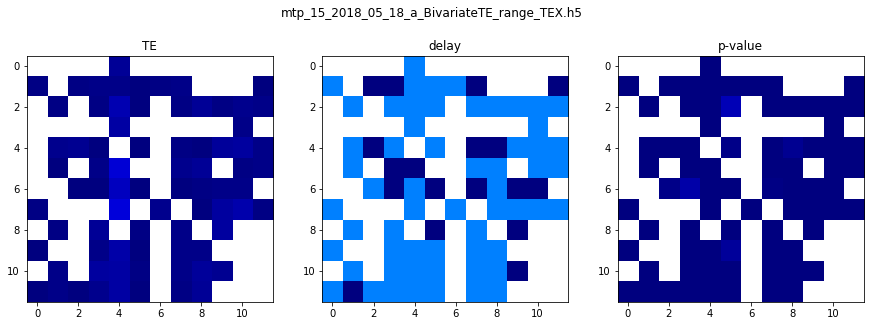

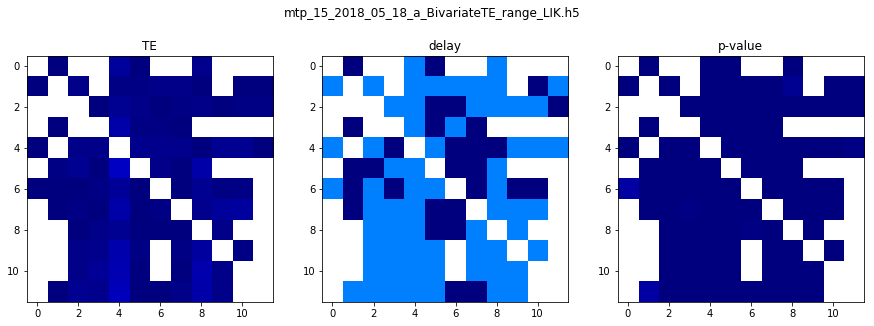

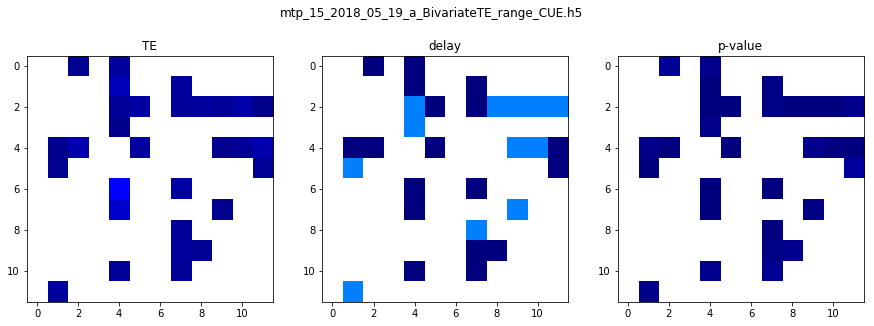

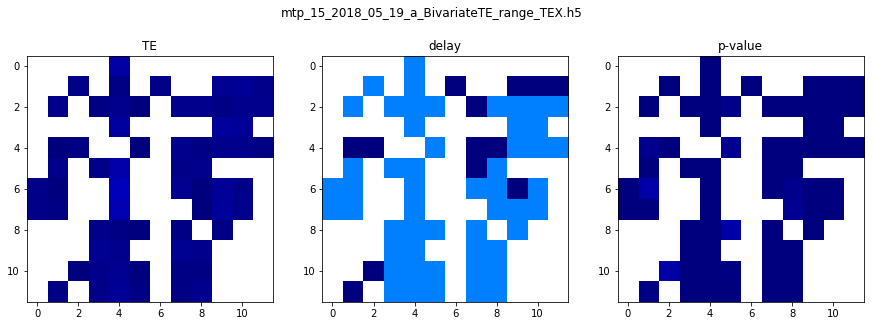

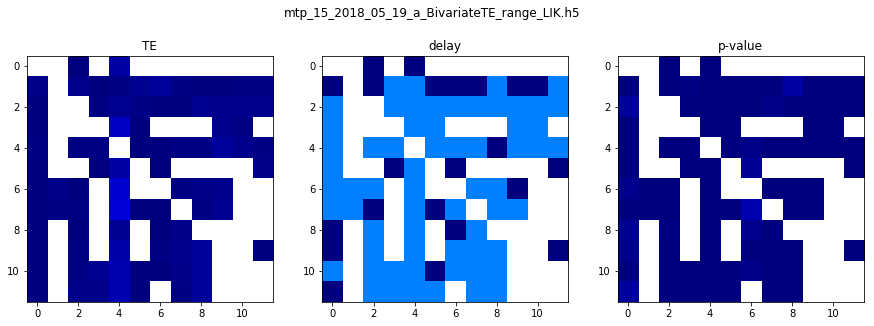

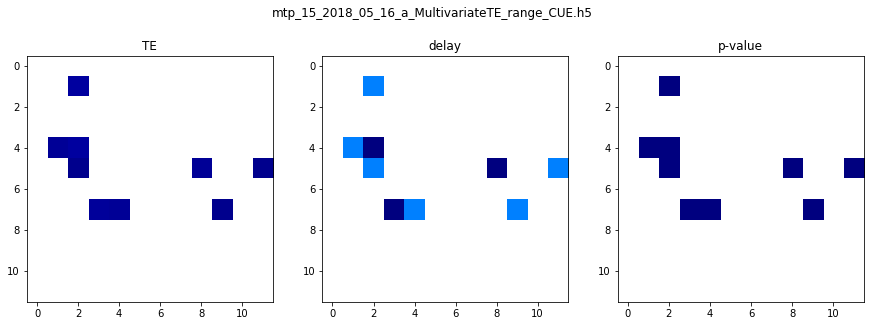

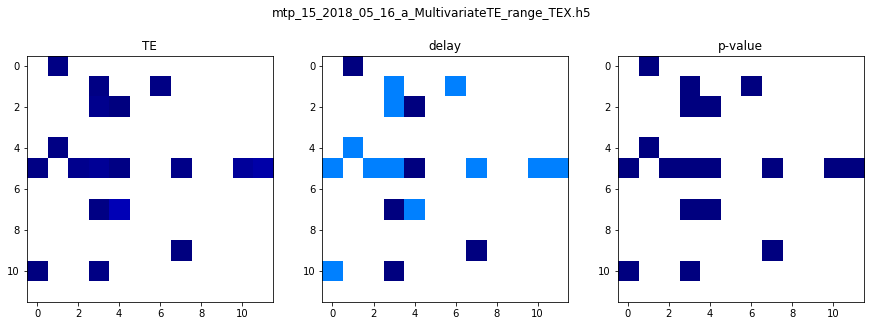

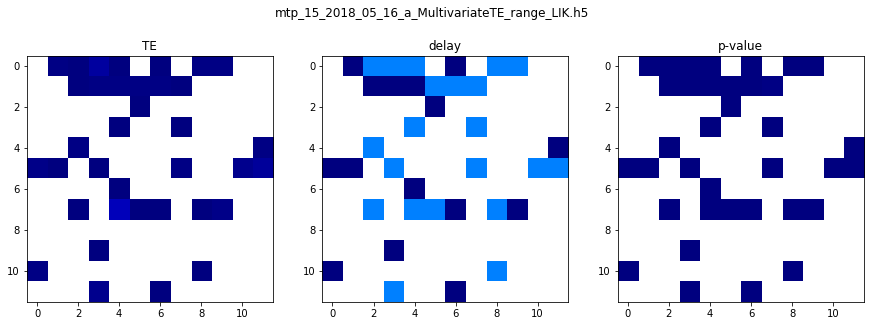

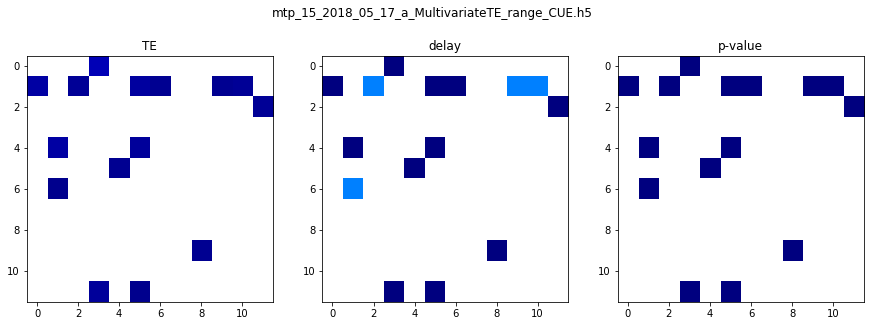

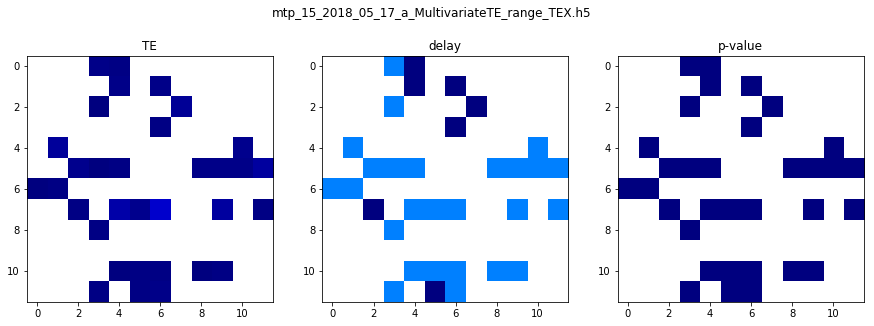

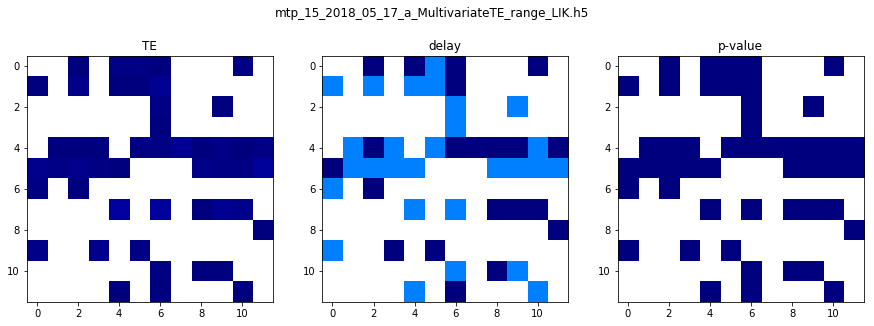

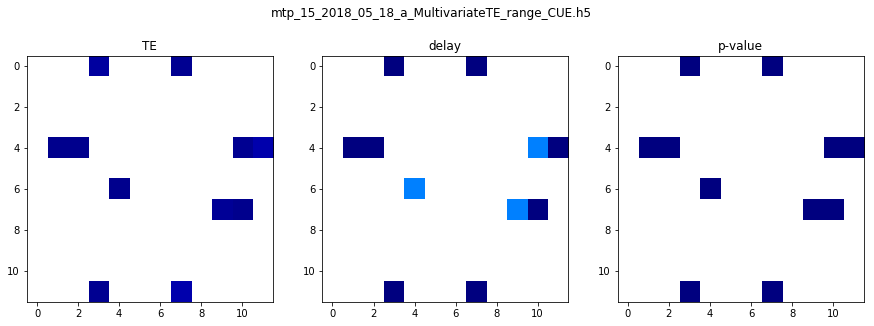

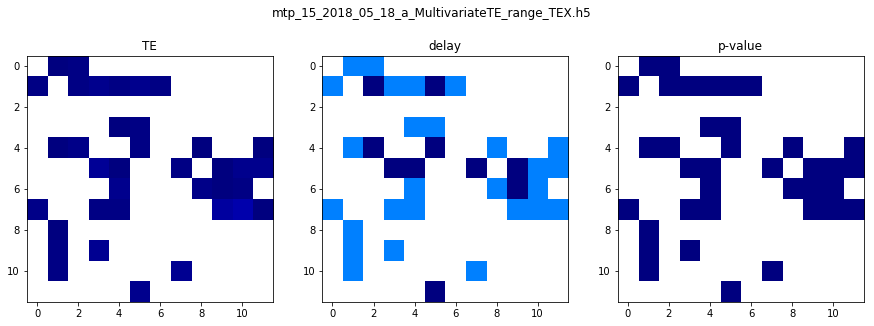

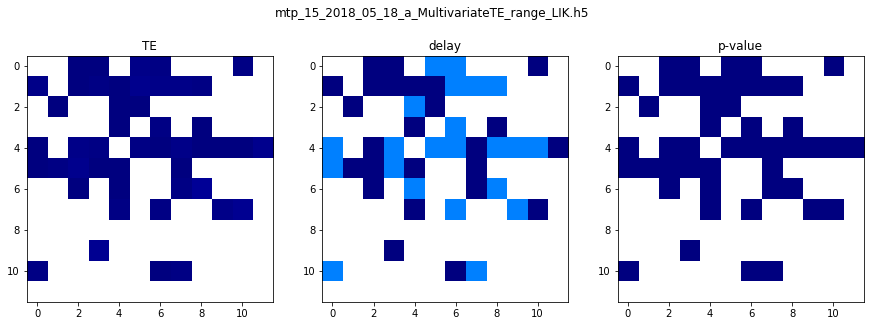

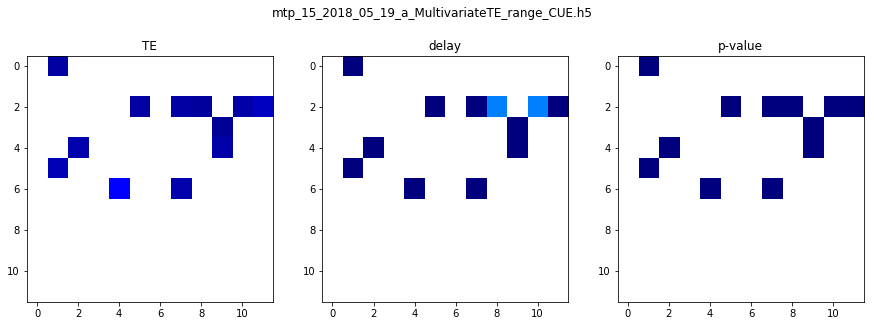

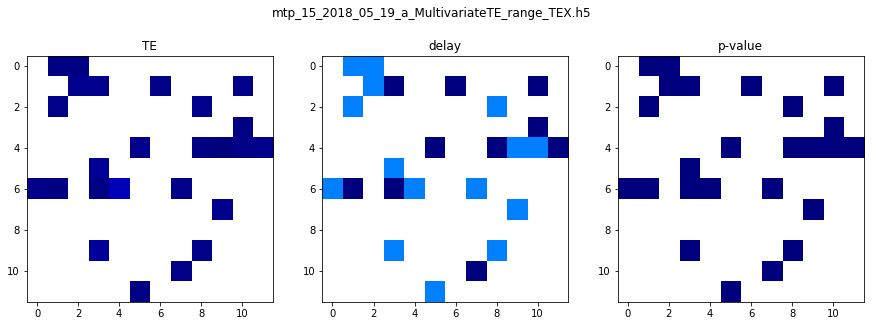

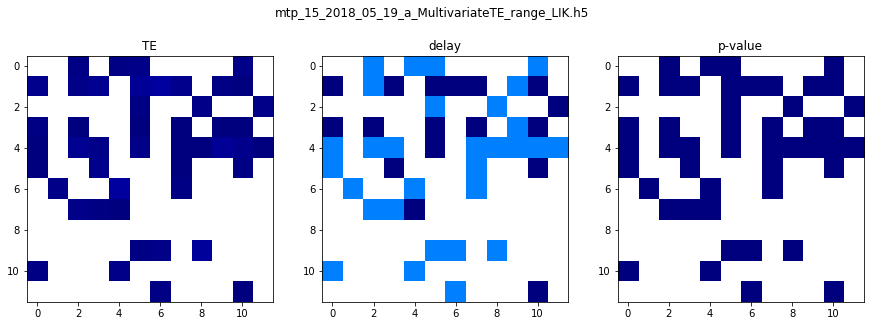

In [11]:
for model in ["BivariateTE", "MultivariateTE"]:
    for i in range(16, 20):
        for rng in ["CUE", "TEX", "LIK"]:
            fname = "mtp_15_2018_05_" + str(i) + "_a_" + model + "_range_" + rng + ".h5"
            te, lag, p = getData(fname)
            
            fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))
            ax[0].imshow(te[:,:], cmap="jet", vmin=0, vmax=1)
            ax[1].imshow(lag[:,:], cmap="jet", vmin=1, vmax=5)
            ax[2].imshow(p[:,:], cmap="jet", vmin=0, vmax=1)
            ax[0].set_title("TE")
            ax[1].set_title("delay")
            ax[2].set_title("p-value")
            
            fig.suptitle(fname)
            plt.show()

## Processing swipe Data

In [6]:
bte_te, bte_lag, bte_p = getData("mtp_15_2018_05_19_a_BivariateTE_swipe.h5")
mte_te, mte_lag, mte_p = getData("mtp_15_2018_05_19_a_MultivariateTE_swipe.h5")

# Interactive
def f(i):
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 8))
    ax[0][0].imshow(bte_te[:,:,i], cmap="jet", vmin=0, vmax=1)
    ax[1][0].imshow(mte_te[:,:,i], cmap="jet", vmin=0, vmax=1)
    ax[0][1].imshow(bte_lag[:,:,i], cmap="jet", vmin=1, vmax=5)
    ax[1][1].imshow(mte_lag[:,:,i], cmap="jet", vmin=1, vmax=5)
    ax[0][2].imshow(bte_p[:,:,i], cmap="jet", vmin=0, vmax=1)
    ax[1][2].imshow(mte_p[:,:,i], cmap="jet", vmin=0, vmax=1)
    
    ax[0][0].set_ylabel("Bivariate")
    ax[1][0].set_ylabel("Multivatiate")
    ax[0][0].set_title("TE")
    ax[0][1].set_title("delay")
    ax[0][2].set_title("p-value")
    plt.show()
    
interactive_plot = interactive(f, i=(0, bte_te.shape[2]-1, 1))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(IntSlider(value=24, description='i', max=49), Output(layout=Layout(height='500px'))), _d…